#### A project on data visualization and derieving data insights through graphical plots and charts from healthcare service sales dataset. 
#### The product is a healthcare diagnostic service and customers  are different hospitals who has availed the healthcare service.

#### The project is divided into following sections:
#### &emsp;&emsp;&emsp;1. Fectching Data - Fectching the database
#### &emsp;&emsp;&emsp;2. data preprocessing - Transforming the crude data into desired format 
#### &emsp;&emsp;&emsp;3. Data visualization and analysis - Visualizing data graphically and deriving analytical insights

# Fetching Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import datetime as dt

%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
sales = pd.read_excel('datasets/health/Healthcare_sector.xlsx', date_parser='Date', sheet_name='Sales')
sales.head()

,Invoice ID,Date,City,Hospital,Unit price,Quantity,Total,Payment,Referral_amount,Rating
0,750-67-8428,01/05/2019,Bangalore,H4,1800,7,12600,A/c,0,9.1
1,226-31-3081,03/08/2019,Bangalore,H1,1500,5,7500,A/c,200,9.6
2,631-41-3108,03/03/2019,Bangalore,H5,1600,7,11200,Cash,0,7.4
3,123-19-1176,01/27/2019,Bangalore,H4,1800,8,14400,A/c,0,8.4
4,373-73-7910,02/08/2019,Bangalore,H6,1500,7,10500,Cash,0,5.3


In [3]:
sales.dtypes

Invoice ID          object
Date                object
City                object
Hospital            object
Unit price           int64
Quantity             int64
Total                int64
Payment             object
Referral_amount      int64
Rating             float64
dtype: object

In [4]:
print(list(sales.columns))

['Invoice ID', 'Date', 'City', 'Hospital', 'Unit price', 'Quantity', 'Total', 'Payment', 'Referral_amount', 'Rating']


In [5]:
sales.drop(['Invoice ID', 'City'], axis=1, inplace=True)

In [6]:
sales['Date'] = pd.to_datetime(sales['Date'])
sales.set_index('Date', inplace=True)
sales.head()

,Hospital,Unit price,Quantity,Total,Payment,Referral_amount,Rating
Date,,,,,,,
2019-01-05,H4,1800,7,12600,A/c,0,9.1
2019-03-08,H1,1500,5,7500,A/c,200,9.6
2019-03-03,H5,1600,7,11200,Cash,0,7.4
2019-01-27,H4,1800,8,14400,A/c,0,8.4
2019-02-08,H6,1500,7,10500,Cash,0,5.3


# Data preprocessing

### converting daily data to monthly data (resampling)

In [77]:
agg_params = {'Quantity': np.sum, 'Unit price':'last', 'Total': np.sum, 'Rating': [np.min, np.max]}
monthly_sales = sales.groupby('Hospital').resample('1M').agg(agg_params)
monthly_sales.columns = ['Total_volume', 'Unit_price', 'Total_revenue', 'Min_rating', 'Max_rating']

In [293]:
monthly_sales.head(10)

Total_volume  Unit_price  Total_revenue  Min_rating  \
Hospital Date                                                              
H1       2019-01-31           333        1500         499500         4.0   
         2019-02-28           313        1500         469500         4.1   
         2019-03-31           325        1500         487500         4.1   
H2       2019-01-31           336        1800         604800         4.1   
         2019-02-28           295        1800         531000         4.0   
         2019-03-31           271        1800         487800         4.0   
H3       2019-01-31           325        1300         422500         4.0   
         2019-02-28           349        1300         453700         4.1   
         2019-03-31           278        1300         361400         4.0   
H4       2019-01-31           254        1800         457200         4.0   

                     Max_rating  
Hospital Date                    
H1       2019-01-31         9.8  
         2019-02-28        10.0  
         2019-03-31         9.9  
H2       2019-01-31         9.9  
         2019-02-28         9.7  
         2019-03-31         9.9  
H3       2019-01-31         9.9  
         2019-02-28         9.9  
         2019-03-31         9.9  
H4       2019-01-31         9.9

In [297]:
# Reorganizing data
monthly_sales_sorted = monthly_sales.sort_index(level=1)
monthly_sales_sorted.reset_index(inplace=True)
monthly_sales_sorted.Date = [x.strftime('%Y-%m') for x in monthly_sales_sorted.Date]
monthly_sales_sorted.head(10)

,Hospital,Date,Total_volume,Unit_price,Total_revenue,Min_rating,Max_rating
0,H1,2019-01,333,1500,499500,4.0,9.8
1,H2,2019-01,336,1800,604800,4.1,9.9
2,H3,2019-01,325,1300,422500,4.0,9.9
3,H4,2019-01,254,1800,457200,4.0,9.9
4,H5,2019-01,342,1600,547200,4.1,9.8
5,H6,2019-01,375,1500,562500,4.1,9.9
6,H1,2019-02,313,1500,469500,4.1,10.0
7,H2,2019-02,295,1800,531000,4.0,9.7
8,H3,2019-02,349,1300,453700,4.1,9.9
9,H4,2019-02,266,1800,478800,4.1,10.0


# Data visualization and analysis

### The insights I have tried to derieve in this section are:
### &emsp;&emsp;&emsp;1. General trend in the data for 3 months period
### &emsp;&emsp;&emsp;2. Month wise total sales
### &emsp;&emsp;&emsp;3. Hospital wise total sales
### &emsp;&emsp;&emsp;4. Percentage contribution of each hospital to overall revenue
### &emsp;&emsp;&emsp;5. Month wise sales comparison of each hospital
### &emsp;&emsp;&emsp;6. Month revenue vs volume relationship of each hospital
### &emsp;&emsp;&emsp;7. Month wise relationship between revenue vs volume and unit price of each hospital

### Determining trend

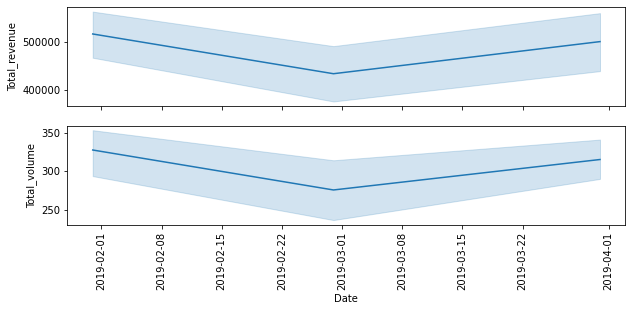

In [88]:
fig, ax = plt.subplots(2, 1, figsize=(10,4), sharex=True)
sb.lineplot(ax=ax[0], x='Date', y='Total_revenue', data=monthly_sales)
var = plt.xticks(x=monthly_sales.index, rotation='vertical', size=10)

sb.lineplot(ax=ax[1], x='Date', y='Total_volume', data=monthly_sales)
var = plt.xticks(x=monthly_sales.index, rotation='vertical', size=10)

#### we see first month revenue is high, it dips in second month and again increases in third month.

### Month wise total sales

In [92]:
total_sales_by_month = monthly_sales_sorted[['Hospital', 'Date','Total_volume', 'Total_revenue']].groupby('Date').sum()
total_sales_by_month.sort_values(by='Total_revenue', ascending=False, inplace=True)
total_sales_by_month.head()

,Total_volume,Total_revenue
Date,,
2019-01,1965,3093700
2019-03,1891,2998800
2019-02,1654,2600000


<AxesSubplot:xlabel='Date', ylabel='Total_revenue'>

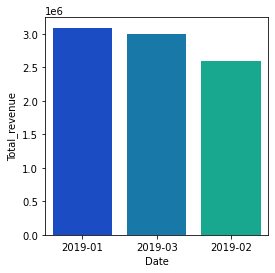

In [288]:
# plotting
fig, ax = plt.subplots(figsize=(4,4))
sb.barplot(x=total_sales_by_month.index, 
           y='Total_revenue', 
           data=total_sales_by_month, 
           ci=95, 
           palette='winter')
#ax.set_xticklabels(labels=max_sales['Date'], rotation='vertical') #optional: for vertical orientation of xlabels

#### we observe month 1 generated higher revenue compared to month 2 and month 3

### Hospital wise total sales

In [289]:
total_sales_by_hosp = monthly_sales_sorted[['Hospital', 'Date','Unit_price', 'Total_volume', 'Total_revenue']].groupby('Hospital').agg(agg_params)
total_sales_by_hosp.sort_values(by='Total_revenue', ascending=False, inplace=True)
total_sales_by_hosp.head()

,Unit_price,Total_volume,Total_revenue
Hospital,,,
H2,1800,902,1623600
H4,1800,854,1537200
H5,1600,911,1457600
H1,1500,971,1456500
H6,1500,920,1380000


Text(0, 0.5, 'Value')

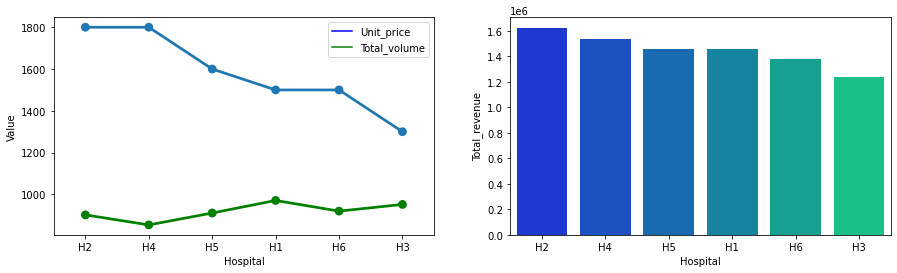

In [290]:
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1, 2, figsize=(15,4), sharex=False, sharey=False)
sb.pointplot(x=total_sales_by_hosp.index, y='Unit_price', data=total_sales_by_hosp, ax=ax[0])
sb.pointplot(x=total_sales_by_hosp.index, y='Total_volume', color='green', data=total_sales_by_hosp, ax=ax[0])
sb.barplot(x=total_sales_by_hosp.index, y='Total_revenue', ci=95, data=total_sales_by_hosp, ax=ax[1], palette='winter')

legend_elements = [Line2D([0], [0], color='blue'),
                   Line2D([0], [0], color='green')]
ax[0].legend(handles = legend_elements, labels=['Unit_price', 'Total_volume'], loc='best')
ax[0].set_ylabel('Value')

#### We observe:
#### H2 generated highest revenue compared to other hospitals
#### H2 and H4 has higher sales compared to H5, H1, H6 and H3 whhich can be attributed to higher unit price
#### H2 is comparitively better that H4 interms of revenue which can be attributed to higher volume comapred to H4
#### H3 is the lowest revenue generator as it has both lower unit price as well as lower volume compared to other hospitals

### Percentage contribution of each individual hospital to overall revenue

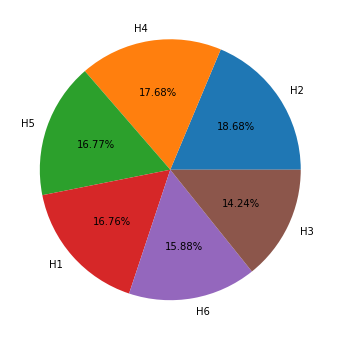

In [291]:
fig, ax = plt.subplots(figsize=(6,6))
fig = plt.pie(total_sales_by_hosp['Total_revenue'], 
              labels=total_sales_by_hosp.index,
              autopct='%1.2f%%')

#### H4 is the most significant contributor (18.68%) to the overall revenue compared to other hospitals

### Month wise sales comparizon of each hospital

In [299]:
sorted_keys = total_sales_by_month.index.tolist()

final_sort = pd.DataFrame()

grp = monthly_sales_sorted.groupby('Date').apply(lambda x: x.sort_values(by='Total_revenue', ascending=False))

for idx in sorted_keys:
    final_sort = final_sort.append(grp.loc[idx])
    
final_sort.reset_index(inplace=True, drop=True)
final_sort.head()

,Hospital,Date,Total_volume,Unit_price,Total_revenue,Min_rating,Max_rating
0,H2,2019-01,336,1800,604800,4.1,9.9
1,H6,2019-01,375,1500,562500,4.1,9.9
2,H5,2019-01,342,1600,547200,4.1,9.8
3,H1,2019-01,333,1500,499500,4.0,9.8
4,H4,2019-01,254,1800,457200,4.0,9.9


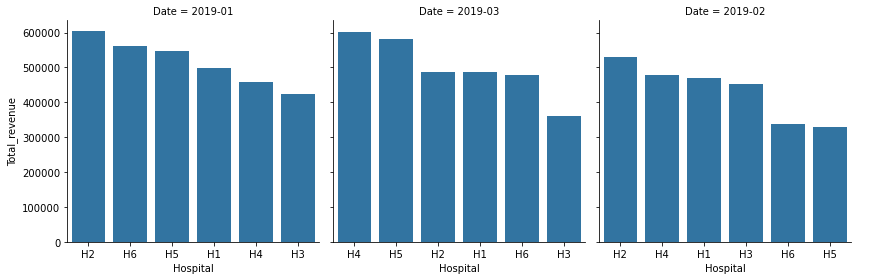

In [287]:
monthly_fg = sb.FacetGrid(final_sort, 
                       col='Date',
                       col_wrap=3,
                       height=4,                       
                       aspect=1, 
                       palette='winter',
                       legend_out=True,
                       sharex=False,
                       margin_titles=True)
monthly_fg.map_dataframe(sb.barplot, 'Hospital', 'Total_revenue')
monthly_fg.add_legend()

#### we observe:
#### Month 1: H2 has highest sales followed by H6, H5, H1, H4, H3
#### Month 3: H4 has highest sales followed by H5, H2, H1, H6, H3
#### Month 3: H2 has highest sales followed by H4, H1, H3, H6, H5

### Month wise relationship between revenue vs volume and unit price of each hospital

In [468]:
final_melt = final_sort[['Hospital', 'Date', 'Unit_price', 'Total_volume', 'Total_revenue']].groupby('Date')
group_dict = {}
for name, grp in final_melt:
    group_dict[name] = grp.reset_index(drop=True)

Text(0.5, 1.0, '2019-03')

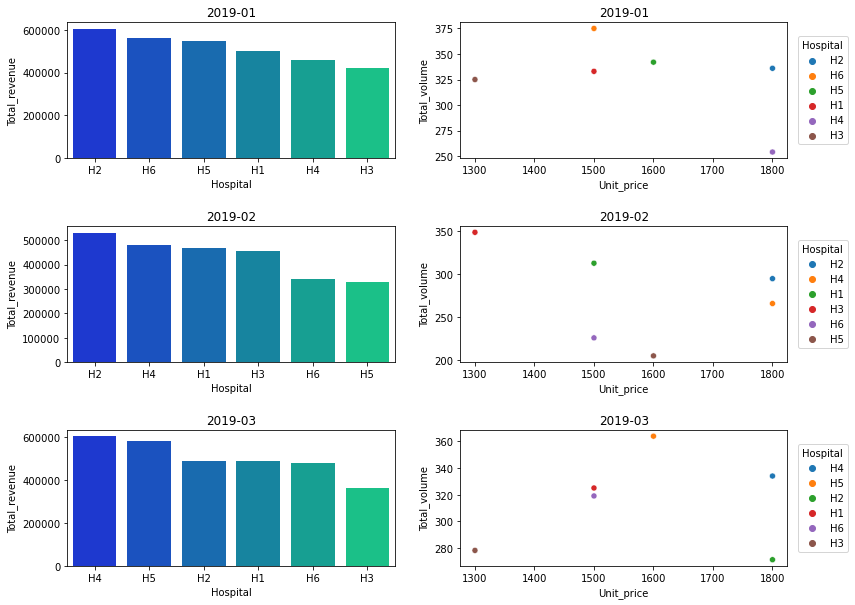

In [470]:
fig, ax = plt.subplots(3, 2, figsize=(10,10), sharex=False, sharey=False)
plt.subplots_adjust(left=0.5, right=1.5, hspace=0.5)

p1 = sb.scatterplot(x='Unit_price', y='Total_volume', hue='Hospital', data=group_dict['2019-01'], ax=ax[0][1])
p1.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1, title='Hospital')
p1b = sb.barplot(x='Hospital', y='Total_revenue', ci=95, data=group_dict['2019-01'],palette='winter', ax=ax[0][0])
p1.set_title('2019-01')
p1b.set_title('2019-01')

p2 = sb.scatterplot(x='Unit_price', y='Total_volume', hue='Hospital', data=group_dict['2019-02'], ax=ax[1][1])
p2.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1, title='Hospital')
p2b = sb.barplot(x='Hospital', y='Total_revenue', ci=95, data=group_dict['2019-02'],palette='winter', ax=ax[1][0])
p2.set_title('2019-02')
p2b.set_title('2019-02')

p3 = sb.scatterplot(x='Unit_price', y='Total_volume', hue='Hospital', data=group_dict['2019-03'], ax=ax[2][1])
p3.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), ncol=1, title='Hospital')
p3b = sb.barplot(x='Hospital', y='Total_revenue', ci=95, data=group_dict['2019-03'],palette='winter', ax=ax[2][0])
p3.set_title('2019-03')
p3b.set_title('2019-03')

#### we had already seen through previous charts and plots that total revenue is directly proportional to volume and unit price
#### Month 1 : H6 has generated hishest sales as it has higher unit price and generated higher volume
#### Month 2 : H3 has higher volume compared to other hospitals but it wasnt able generated higher sales as it has lower unit price. Whereas H2 generated higher revenue at it has higher unit price
#### Month 3 : H4 generated higher sales compared to others as it has higher unit price. H5 has higher volume compared to other hospitals but it wasnt able generated higher sales as it has lower unit price compared to H4 and H2

### Final summary plot

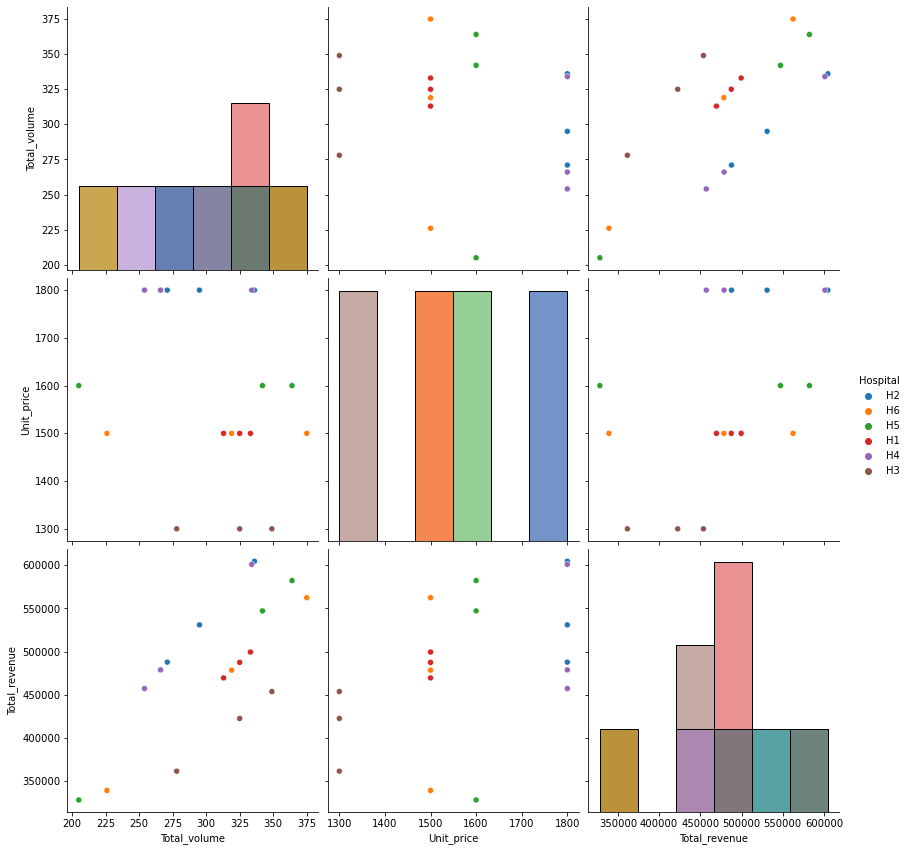

In [242]:
final_pp = final_sort.drop(['Min_rating', 'Max_rating'], axis=1)
sb.pairplot(final_pp, hue='Hospital', diag_kind='hist', height=4)

#### This plots summarizes all the insights derieved earlier.